## Text Mining: 한국어 처리

### 참고 사이트 
http://konlpy-ko.readthedocs.io/ko/v0.4.3/ 
<br> https://www.lucypark.kr/courses/2015-dm/text-mining.html

In [1]:
#파이썬 버전확인
import sys
print(sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


### koNLPy : 5종류의 한국어 형태소 분석기 제공

#### 설치 http://konlpy-ko.readthedocs.io/ko/v0.4.3/install/
    
<br> 1. JAVA 설치 <https://java.com/ko/download/>
<br> 2. 환경변수 JAVA_HOME 설정 https://docs.oracle.com/cd/E19182-01/820-7851/inst_cli_jdk_javahome_t/index.html
<br> 3. JPype1 (>=0.5.7)을 다운로드 받고 설치 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
<br> OS 버전과 파이썬 버전을 확인하고 자신의 환경에 맞는 파일을 다운로드
<br> 예) 64bit 윈도우에 파이썬 버전은 3.6: JPype1-0.6.3-cp36-cp36m-win_amd64.whl
<br> Anaconda prompt에서 아래 명령어를 실행
<br> > pip install JPype1-0.6.3-cp36-cp36m-win_amd64.whl
<br> 4. pip로 KoNLPy 설치
<br> Anaconda prompt에서 아래 명령어를 실행
<br> > pip install konlpy

#### 설치화면 예제

(base) C:\Users\text>cd Downloads

(base) C:\Users\text\Downloads>ls JP*.*
<br>JPype1-0.6.2-cp35-cp35m-win_amd64.whl  JPype1-0.6.3-cp36-cp36m-win_amd64.whl

(base) C:\Users\text\Downloads>pip install JPype1-0.6.3-cp36-cp36m-win_amd64.whl
<br>Processing c:\users\suli91\downloads\jpype1-0.6.3-cp36-cp36m-win_amd64.whl
<br>distributed 1.21.8 requires msgpack, which is not installed.
<br>Installing collected packages: JPype1
<br>Successfully installed JPype1-0.6.3

(base) C:\Users\text\Downloads>pip install konlpy
<br>Requirement already satisfied: konlpy in c:\users\suli91\anaconda3\lib\site-packages (0.4.4)
<br>distributed 1.21.8 requires msgpack, which is not installed.

### 예제파일 가져오기
koNLPy corpus에서 대한민국헌법 텍스트 파일을 로드

In [5]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()

In [6]:
print(type(c)) #가져온 데이터의 type을 확인
print(len(c))
print(c[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


#### NLTK를 이용해서 tokenize를 할 수 있을까? -> 배운대로 적용 시도

In [7]:
#tokenize --> 주어진 단어코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업 --> 토큰화(tokenization) 
#토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c) #문장 단위로 토큰화
print(len(c_sent))
print(c_sent[:5]) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YeonJI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


In [8]:
#word로 tokenize(단어로 토큰화)
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words)

4640

In [9]:
" ".join(c_words[:50])

'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고 , 모든 사회적 폐습과 불의를 타파하며 , 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히'

역시 한글은 nltk로는 잘 tokenize되지 않는다!!! 대안은?
### koNLPy의 형태소 분석 및 품사 태깅 기능 사용법
http://konlpy.org/ko/v0.4.3/api/konlpy.tag/

morphs(phrase): Parse phrase to morphemes. (형태소)

nouns(phrase): Noun extractor. (명사)

phrases(phrase): Phrase extractor. (어절)

(형태소 단위로 쪼갠 후, 각 품사들을 태깅하여 리스트 형태로 반환해줌.)
pos(phrase, norm=False, stem=False): POS tagger. In contrast to other classes in this subpackage, this POS tagger doesn’t have a flatten option, but has norm and stem options. Check the parameter list below.
<br>매개 변수:	
<br>norm – If True, normalize tokens.
<br>stem – If True, stem tokens.


In [11]:
from konlpy.tag import Okt
okt = Okt() #OKt 객체 생성
tokens_c = okt.morphs(c) #형태소 단위로 tokenize

In [12]:
len(tokens_c)

8796

In [13]:
type(tokens_c)

list

In [14]:
" ".join(tokens_c[:50])

'대한민국 헌법 \n\n 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 · 1 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 4 · 19 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명'

### nltk의 Text class를 이용하여 다양한 기능을 수행
http://www.nltk.org/_modules/nltk/text.html

https://www.nltk.org/book/ch01.html

In [22]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "대한민국헌법")
c_nltk_text

nltk.text.Text

In [24]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))
# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens)))

8796
1364


In [25]:
#단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab()

FreqDist({'의': 380, '.': 357, '에': 282, '을': 211, '\n': 195, '은': 179, '제': 178, '이': 176, '한다': 155, '·': 145, ...})

#### 그림을 그리기 전 한글폰트를 설정

In [23]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

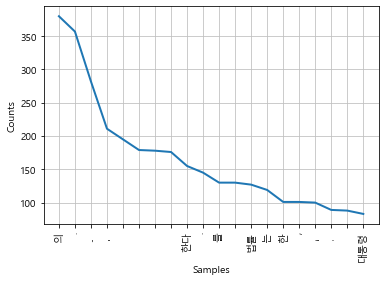

In [26]:
#상위 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

문제점: 의미 없는 단어나 특수문자가 많으므로 정제가 필요

In [27]:
tokens_new = []
for token in tokens_c:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip())
print(len(tokens_new))

4520


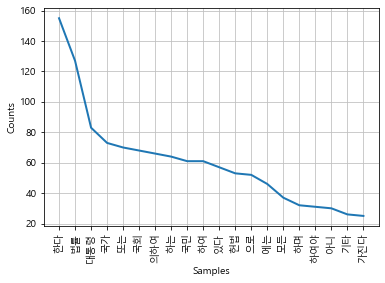

In [28]:
c_nltk_text = nltk.Text(tokens_new, name = "대한민국헌법")
c_nltk_text.plot(20)

In [29]:
#특정한 단어의 빈도를 알고 싶다면
c_nltk_text.count('대한민국')

11

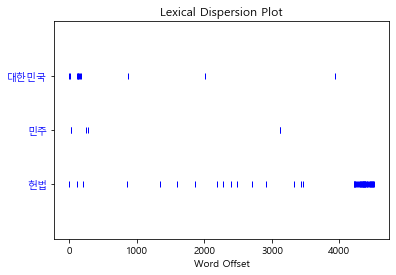

In [30]:
# 단어들 중 주어진 단어들의 위치를 표시
c_nltk_text.dispersion_plot(['대한민국', '민주', '헌법'])

### context를 보는 방법
concordance(): 주어진 단어를 중심으로 앞 뒤의 단어들을 보여 줌

In [36]:
c_nltk_text.concordance('헌법')

Displaying 25 of 53 matches:
대한민국 헌법 유구 역사 전통 빛나는 우리 국민 운동 으로 건립 대한민국 임시정부
원히 확보 다짐 하면서 1948년 7월 12일 제정 되고 걸쳐 개정 헌법 이제 국회 의결 거쳐 국민투표 의하여 개정 한다 1조 대한민국 민주
방위 신성한 의무 수행 사명 으로 하며 정치 중립성 준수 된다 6조 헌법 의하여 체결 공포 조약 일반 으로 승인 국제 법규 국내법 같은 효력
청원 권리 가진다 국가 청원 대하 심사 의무 진다 27조 모든 국민 헌법 법률 법관 의하여 법률 의한 재판 받을 권리 가진다 군인 또는 군무
한다 모든 국민 보건 하여 국가 보호 받는다 37조 국민 자유 권리 헌법 열거 되지 아니한 이유 경시 되지 아니 한다 국민 모든 자유 권리 
시 하여야 한다 48조 국회 의장 인과 부의 선출 한다 49조 국회 헌법 또는 법률 특별한 규정 없는 재적 의원 과반수 출석 출석 의원 과반
 에서 예산안 의결 까지 다음 목적 경비 년도 예산 하여 집행 있다 헌법 이나 법률 의하여 설치 기관 또는 시설 유지 운영 법률상 지출 의무
위원회 위원 감사원장 감사 위원 기타 법률 공무원 직무 집행 있어서 헌법 이나 법률 배한 에는 국회 탄핵 의결 있다 항의 탄핵 국회 재적 의
 대하 국가 대표 한다 대통령 국가 독립 영토 보전 국가 계속 성과 헌법 수호 책무 진다 대통령 조국 평화 통일 성실한 의무 진다 행정권 대
이내 후임 선거 한다 69조 대통령 취임 즈음 하여 다음 선서 한다 헌법 준수 하고 국가 보위 하며 조국 평화 통일 국민 자유 복리 증진 민
교사절 신임 접수 또는 파견 하며 선전포고 강화 한다 74조 대통령 헌법 법률 하는 의하여 국군 통수 한다 국군 조직 편성 법률 한다 75조
 계엄 해제 요구 에는 대통령 이를 해제 하여야 한다 78조 대통령 헌법 법률 하는 의하여 공무원 임면한 79조 대통령 법률 하는 의하여 사
 한다 국정 계획 정부 일반 정책 선전 강화 기타 중요한 대외 정책 헌법 개정안 국민투표 조약 법률 

similar(): 주어진 단어와 비슷한 context에서 사용된 단어들을 반환

In [37]:
c_nltk_text.similar('헌법')

의하여 공포 행위 공공필요 국무총리 자격 정년


collocation is a sequence of words that occur together unusually often.

### 명사만 추출해서 처리하기
kkma와 Twitter 비교

In [55]:
nc = okt.nouns(c) #nouns_constitution
print(len(nc))
print(" ".join(nc[:50]))

3882
대한민국 헌법 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 법 통과 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입 각하 정의 인도 동포 애 로써 민족 단결 공고 모든 사회 폐습 불의 타파 자율 조화 바탕 자유민주 질서 더욱 정치 경제 사회 문화 모든


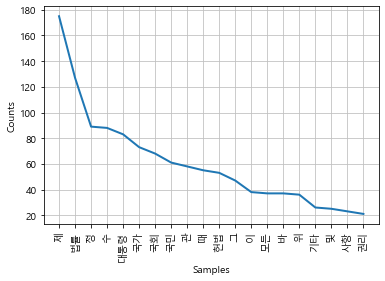

In [56]:
ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20)

### English Word Cloud

https://github.com/amueller/word_cloud

아나콘다를 쓰는 경우 아래와 같이 install
<br>> conda install -c conda-forge wordcloud

간단한 예제 https://github.com/amueller/word_cloud/blob/master/examples/simple.py

In [60]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:

import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open('austen-emma.txt').read()

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\YeonJI\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


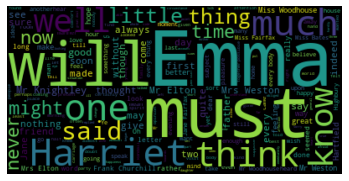

In [2]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_en)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

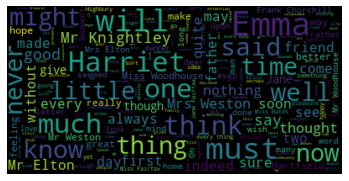

In [3]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(doc_en)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 한글 Word Cloud

위에서 사용한 WordCloud 패키지를 이용하여 한글 word cloud도 그릴 수 있음
<br>단 그냥 그리면 폰트가 깨지므로 한글폰트를 아래와 같이 지정해주어야 함

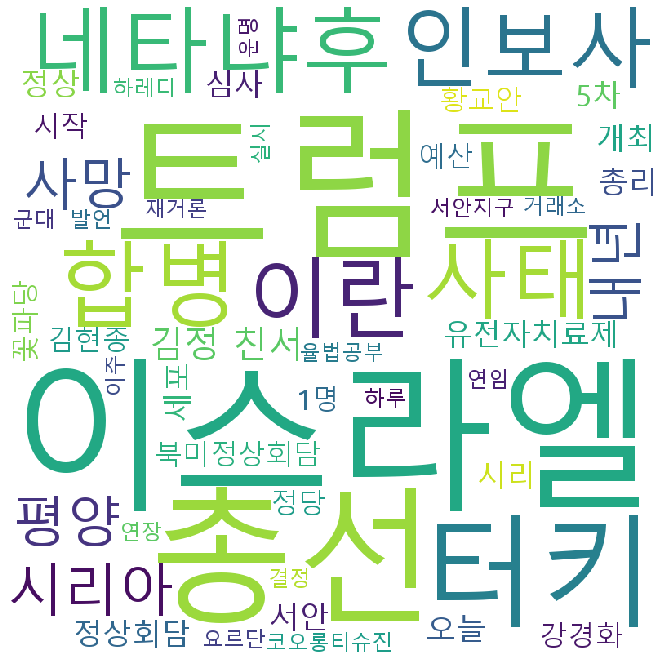

In [17]:
## text 파일로부터 읽어들여 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
font_path = 'c:/Windows/Fonts/malgun.ttf' #한글 폰트의 위치를 지정
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
    max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

text=open('test2.txt').read() #텍스트 파일을 읽음  #메모장으로 열었을 경우 파일의 인코딩을 ANSI로 바꿔줘야함
wordcloud = wordcloud.generate(text) #워드 클라우드 생성
 
fig = plt.figure(figsize=(12,12)) #그림판 크기를 지정
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

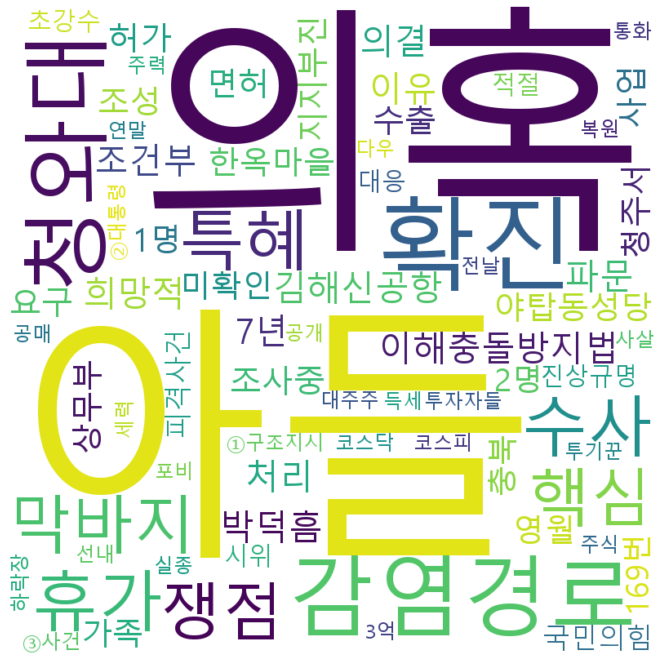

In [18]:
## 다음 한글 기사 읽어오기
from collections import Counter
import random
import webbrowser

from konlpy.tag import Hannanum
import sys
from bs4 import BeautifulSoup
import urllib.request as req


def get_bill_text_daum():
    url1 = "http://media.daum.net" #URL 변경됨
    res = req.urlopen(url1)
    soup = BeautifulSoup(res, "html.parser")

    text2=soup.select("strong.tit_g > a.link_txt")
    kk=[a.string for a in text2]
    corpus = ''
    for text in kk:
        text = text.replace('\r','').replace('\n','').replace('\t','')
        corpus = corpus + ' ' +text
     
    return corpus

def get_tags(text, ntags=50, multiplier=10):
    h = Hannanum()
    nouns = h.nouns(text)
    count = Counter(nouns)
    return(nouns)
   
text = get_bill_text_daum()
tags = get_tags(text)
#print(tags)
#print(" ".join(tags))

### 워드클라우드 그리기
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
   # max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

wordcloud = wordcloud.generate(" ".join(tags)) #위에서 만든 tags를 이용하여 word cloud 생성
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear") #글자의 테두리를 매끄럽게... 위의 결과와 비교
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png') #이미지 파일로 저장

#### 동일한 데이터에 대하여 nltk를 이용해 빈도 그래프 그리기

C:\Users\YeonJI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YeonJI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YeonJI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YeonJI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54841 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YeonJI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YeonJI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51652 missing 

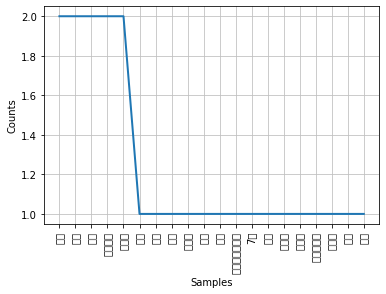

In [23]:
new_tags = []
for token in tags:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        new_tags.append(token.strip())

cnt = nltk.Text(new_tags, name = "다음기사수집")
cnt.plot(20)

### 외부 csv파일에서 데이터를 읽어와 필요한 부분에 대해서만 word cloud 그리기

In [20]:
import pandas as pd
df = pd.read_csv('movie_data.csv', header=None, names=['review', 'rate', 'name'])
df.columns.tolist()
#".".join(df.review.tolist())

['review', 'rate', 'name']

In [21]:
df.head() #파일의 내용 미리보기 (상위 5개)

,review,rate,name
0,오~~ 종합선물셋트,9,인피니티 워
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,10,인피니티 워
2,이제 남은건타노스 밖에,10,인피니티 워
3,타노스는 발암물질이다.,9,인피니티 워
4,정말재미있게봤습니다,10,인피니티 워


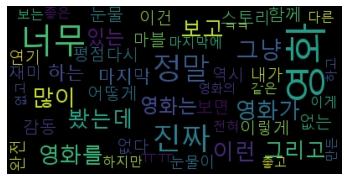

In [22]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    #width = 800,
    #height = 800, 
    #background_color='white',
    max_words=50
)

wordcloud = wordcloud.generate(" ".join(df.review.tolist())) #review column의 내용을 가져와서 word cloud 그리기
 
fig = plt.figure()
#fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

## 네이버 기사 댓글 워드클라우드 그려보기

In [52]:
from selenium.webdriver import Firefox
import time

In [60]:
import pandas as pd #크롤링결과 csv에 저장

In [68]:
df2 = pd.DataFrame({"text": TEXT})
df2.head()
df2.columns.tolist()

['text']

In [66]:
df2.to_csv("navernews_c.csv", index=False)

<Figure size 432x288 with 0 Axes>

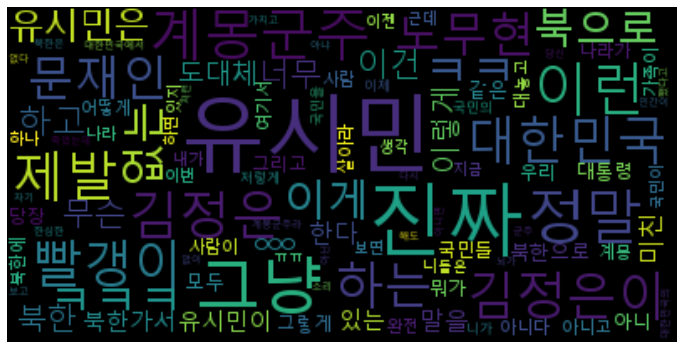

In [72]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    max_words=100
)

wordcloud = wordcloud.generate(" ".join(df2.text.tolist()))
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')